<div style="text-align: center; font-size: 46px; color: blue;">
    <u><b>COGNIFYZ INTERSHIP</b></u>
</div>

<div style="text-align: center; font-size: 35px; color: red;">
    <u><b>LEVEL 3 - TASK 3 : PRICE RANGE VS ONLINE DELIVERY AND TABLE BOOKING</b></u>
</div>

<div style="text-align: LEFT; font-size: 20px; color: white;">
    <p>1. Analyze if there is a relationship between the price range and the availability of online delivery and table booking</p>
    <p>2. Determine if higher-priced restaurants are more likely to offer these services</p>
</div>

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>LOADING LIBRARIES</b></u>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>LOADING DATASET</b></u>
</div>

In [2]:
# Load the dataset
data=pd.read_csv("dataset.csv")
data

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


<div style="text-align: left; font-size: 26px; color: PURPLE;">
    <u><b>DATA EXPLORATION</b></u>
</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [4]:
data.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [5]:
data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

## Prepare the data

#### Ensure the columns Has Online delivery, Has Table booking, and Price range are consistent:

In [6]:
# Standardize values (just in case)
data['Has Online delivery'] = data['Has Online delivery'].str.strip().str.title()
data['Has Table booking'] = data['Has Table booking'].str.strip().str.title()

## Analyze Online Delivery vs Price Range

#### create a pivot table to see the percentage of restaurants that offer online delivery in each price range.

In [7]:
# Calculate percentage of restaurants with online delivery per price range
online_delivery_by_price = pd.crosstab(data['Price range'], data['Has Online delivery'], normalize='index') * 100

print("Percentage of restaurants offering online delivery by price range:")
print(online_delivery_by_price)

Percentage of restaurants offering online delivery by price range:
Has Online delivery         No        Yes
Price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


### Visualize

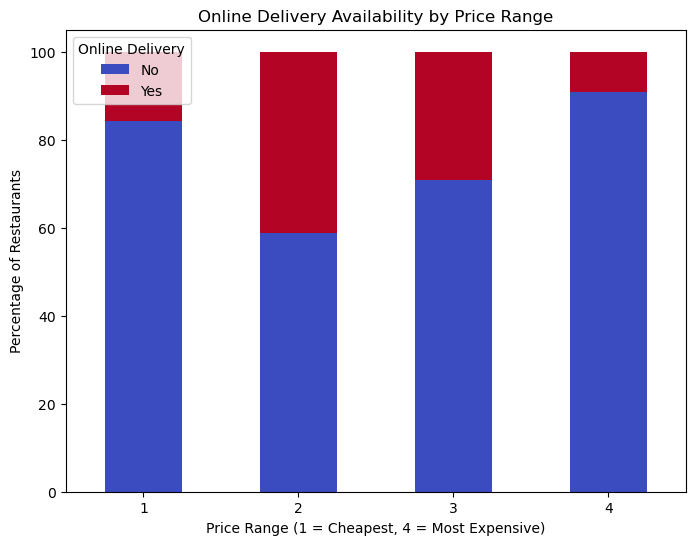

In [8]:
online_delivery_by_price.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='coolwarm')
plt.title('Online Delivery Availability by Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery')
plt.show()

## Analyze Table Booking vs Price Range

In [9]:
# Calculate percentage of restaurants with table booking per price range
table_booking_by_price = pd.crosstab(data['Price range'], data['Has Table booking'], normalize='index') * 100

print("Percentage of restaurants offering table booking by price range:")
print(table_booking_by_price)

Percentage of restaurants offering table booking by price range:
Has Table booking         No        Yes
Price range                            
1                  99.977498   0.022502
2                  92.322518   7.677482
3                  54.261364  45.738636
4                  53.242321  46.757679


### Visualize

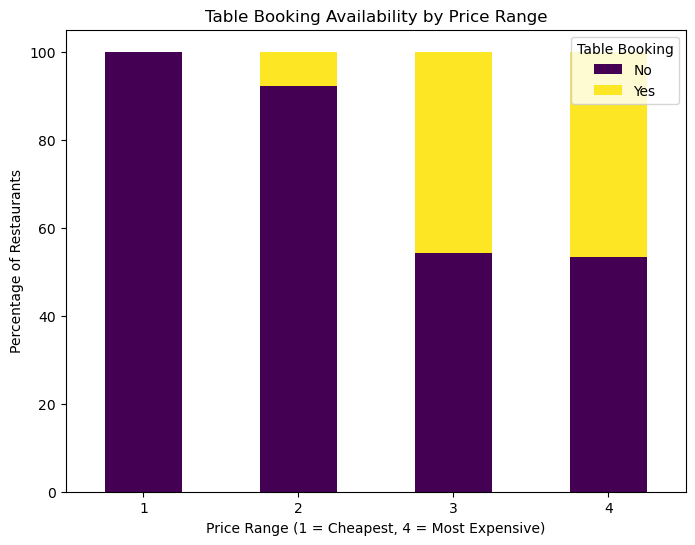

In [10]:
table_booking_by_price.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Table Booking Availability by Price Range')
plt.ylabel('Percentage of Restaurants')
plt.xlabel('Price Range (1 = Cheapest, 4 = Most Expensive)')
plt.xticks(rotation=0)
plt.legend(title='Table Booking')
plt.show()

## CONCLUSION

### Higher-priced restaurants (Price Ranges 3 and 4) are significantly more likely to offer table booking, with nearly 46% providing the service. However, online delivery is more common in mid-range restaurants (Price Range 2), while the most expensive ones (Range 4) offer it the least.